In [1]:
import os
import pandas as pd 
import numpy as np

from random import seed
from random import randint

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.layers import Dropout

from tqdm import tqdm
from keras.applications.vgg16 import preprocess_input

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Helper functions to "clean" the data for the MLP and export the features

def add_padding(dataset=None, pad_width = 0, constant_values=0):
    padded_dataset = []
    
    for i in dataset:
        padded = np.pad(i, pad_width=pad_width, mode='constant', constant_values=constant_values)
        padded_dataset.append(padded[:, :, np.newaxis])
    
    return padded_dataset
    
def preprocess(dataset):
    new_dataset = np.asarray(dataset)
    
    dimension = np.prod(new_dataset.shape[1:])

    new_dataset = new_dataset.reshape(new_dataset.shape[0], dimension)
    new_dataset = new_dataset.astype('float32')
        
    return new_dataset, dimension

def write_matrix_to_file(matrix=None, file_path="random.txt"):
    with open(file_path, 'wb') as f:
        for line in matrix:
            np.savetxt(f, line, delimiter=' ')

def write_output_to_file(index, features, output_type):
    features = np.matrix(features)
    
    if output_type == 0:
        path = os.path.join('./variated_ann/variated_outputs', 'simple_ann_train_features_'+ str(index) +'.out')
    else:
        path = os.path.join('./variated_ann/variated_outputs', 'simple_ann_test_features_'+ str(index) +'.out')
    
    write_matrix_to_file(features, file_path=path)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

new_x_train = add_padding(x_train, pad_width=2, constant_values=0)
new_x_test = add_padding(x_test, pad_width=2, constant_values=0)

new_x_train, x_train_dim = preprocess(new_x_train)
new_x_test, x_test_dim = preprocess(new_x_test)

In [4]:
MAX_N_OF_LAYERS = 10
MAX_NEURONS_VALUE = 5
NEURONS_NUMBER_MULTIPLIER = 50

class randomizedANN:
    def __init__(self, input_shape, input_size, output_size):
        self.model = Sequential()    
        self.n_of_neurons = 0
        self.n_of_layers = 0
        self.has_dropout = 0
        self.history = None
        
        self.generate_random_values()
            
        # Input layer
        self.model.add(Dense(input_size, input_shape=(input_shape,)))

        for _ in range(self.n_of_layers):
            if self.has_dropout:
                self.model.add(Dropout(0.05))
            self.model.add(Dense(self.n_of_neurons, activation='relu'))
        
        # Output layer
        self.model.add(Dense(output_size, activation='relu'))
    
    def generate_random_values(self):
        seed(randint(1, 9999))

        self.n_of_neurons = randint(1, MAX_NEURONS_VALUE) * NEURONS_NUMBER_MULTIPLIER
        self.n_of_layers = randint(1, MAX_N_OF_LAYERS)
        self.has_dropout = True if randint(0, 1) == 1 else False
        
    def log(self):
        print('Number of neurons: ', self.n_of_neurons)
        print('Number of layers: ', self.n_of_layers)
        print('Has dropout: ', 'Yes' if self.has_dropout else 'No')
    
    def compile_model(self, loss_function='mse', metrics='mse'):
        self.model.compile(loss=loss_function,
                      optimizer='adam',
                      metrics=[metrics])

    def train_model(self, x_train, y_train, patience=25, batch_size=1000, epochs=250):
        if epochs == 0 or batch_size == 0:
            raise Exception('Numbers must be bigger than zero.')

        self.compile_model()

        earlyStopping = EarlyStopping(monitor='val_loss', 
                                      patience=patience)

        self.history = self.model.fit(x_train,
                            y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            verbose=0,
                            validation_split=0.2, 
                            callbacks=[earlyStopping])

ANN Nº:  0 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)   

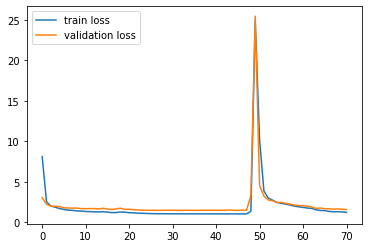

313/313 [==============================] - 1s 2ms/step - loss: 1.5728 - mse: 1.5728


ANN Nº:  1 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 100)               102500    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_____________________

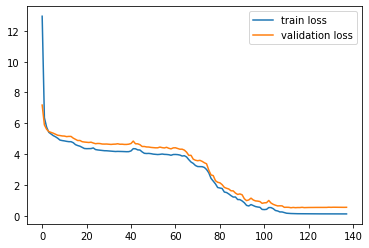

313/313 [==============================] - 1s 2ms/step - loss: 0.4914 - mse: 0.4914


ANN Nº:  2 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_23 (Dense)             (None, 100)               102500    
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_____________________

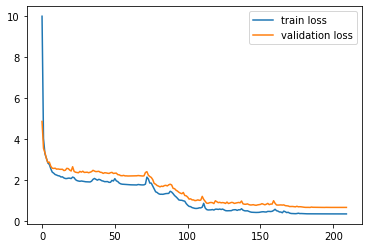

313/313 [==============================] - 1s 2ms/step - loss: 0.7117 - mse: 0.7117


ANN Nº:  3 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_33 (Dense)             (None, 150)               153750    
_________________________________________________________________
dense_34 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_35 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_36 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_37 (Dense)             (None, 150)               22650     
_____________________

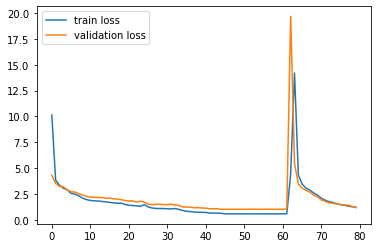

313/313 [==============================] - 1s 2ms/step - loss: 1.2262 - mse: 1.2262


ANN Nº:  4 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 250)               256250    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_____________________

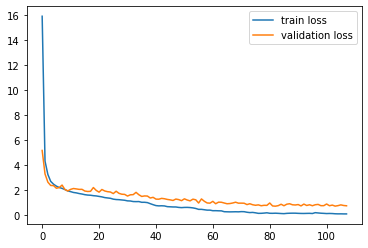

313/313 [==============================] - 1s 1ms/step - loss: 0.7750 - mse: 0.7750


ANN Nº:  5 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 150)               153750    
_________________________________________________________________
dropout_5 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_____________________

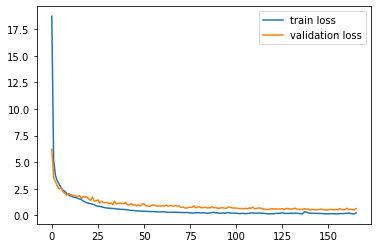

313/313 [==============================] - 1s 1ms/step - loss: 0.6159 - mse: 0.6159


ANN Nº:  6 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_57 (Dense)             (None, 50)                51250     
_________________________________________________________________
dense_58 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_59 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_60 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_61 (Dense)             (None, 50)                2550      
_____________________

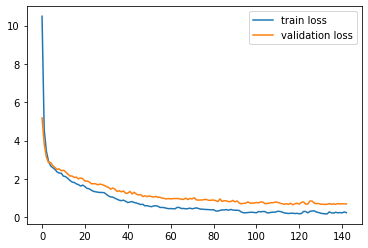

313/313 [==============================] - 1s 2ms/step - loss: 0.6492 - mse: 0.6492


ANN Nº:  7 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 100)               102500    
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_____________________

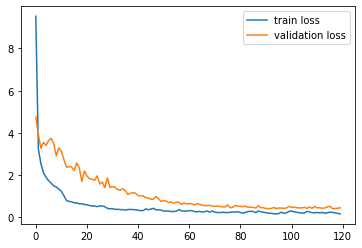

313/313 [==============================] - 1s 2ms/step - loss: 0.4573 - mse: 0.4573


ANN Nº:  8 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 150)               153750    
_________________________________________________________________
dropout_18 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_19 (Dropout)         (None, 150)               0         
_____________________

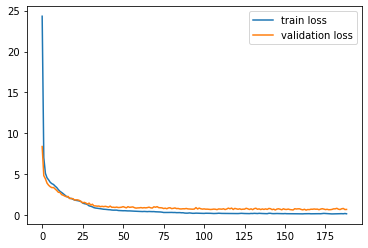

313/313 [==============================] - 1s 1ms/step - loss: 0.7162 - mse: 0.7162


ANN Nº:  9 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_81 (Dense)             (None, 50)                51250     
_________________________________________________________________
dense_82 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_83 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_84 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_85 (Dense)             (None, 50)                2550      
_____________________

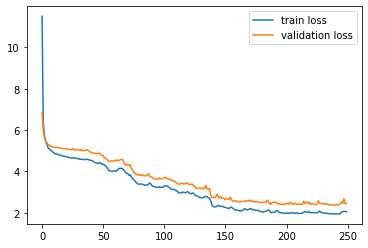

313/313 [==============================] - 1s 2ms/step - loss: 2.4412 - mse: 2.4412




In [5]:
for i in range(10):
    print('ANN Nº: ', i, '\n')

    random_ann = randomizedANN(x_train_dim, 1024, 512)
    random_ann.train_model(new_x_train, y_train)
    random_ann.model.summary()
    
    print('\n')
    
    plt.plot(random_ann.history.history['loss'], label='train loss')
    plt.plot(random_ann.history.history['val_loss'], label='validation loss')
    plt.legend()
    plt.show()

    test_results = random_ann.model.evaluate(new_x_test, y_test, verbose=1)
    
    train_features = random_ann.model.predict(new_x_train)
    test_features = random_ann.model.predict(new_x_test)
    
    write_output_to_file(i, train_features, 0)
    write_output_to_file(i, test_features, 1)
    
    print('\n')